# Galactic Mapping

In [1]:
# Setup data retrieval
from lab_4_data_loading import fits_ell

from numpy import arange
ell_values = arange(-8,250,2)

from freqs import freqs
freqs = freqs().value

In [2]:
# Visualization
import matplotlib.pyplot as plt
from set_mpl import set_mpl
set_mpl()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib as mpl
import matplotlib.collections as mcoll
import matplotlib.path as mpath
import matplotlib.cm as cm

In [3]:
# All the data manipulation functions, and a few ancillary ones
from data_manipulation import *

from multiple_peak_finder import multiple_peak_finder

## Plot data for one $\ell$ 

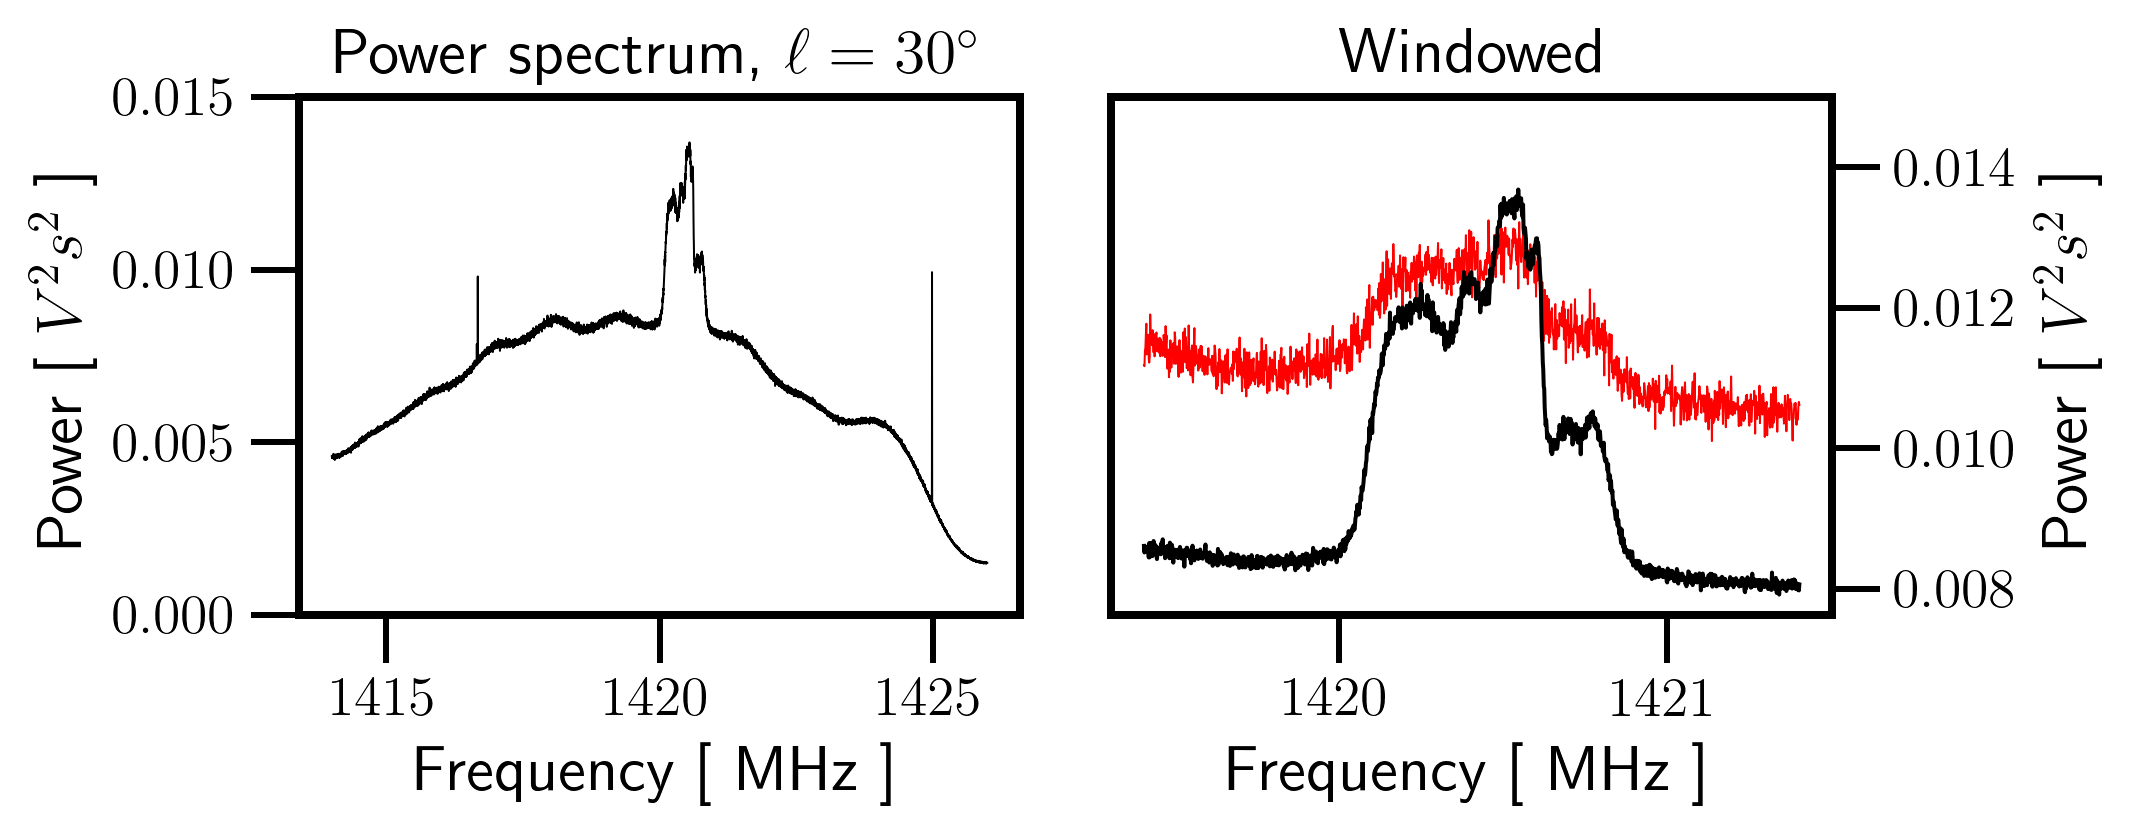

In [4]:
# Representative Plot
fig, axes = plt.subplots(1,2, figsize = (7.5,3), dpi = 144)

ax = axes[0]

ax.plot(freqs, fix_zeros(mean_spectra(fits_ell(30), combine = False)), lw = 0.5, color = 'black')

ax.set_xlabel('Frequency [ MHz ]')
ax.set_ylabel(r'Power [ $V^2 s^2$ ] ')
ax.set_title(r'Power spectrum, $\ell = 30^\circ$')
ax.set_ylim(0,0.015)


ax = axes[1]

ax.plot(freqs_window, spectra_in_window(mean_spectra(fits_ell(30, noise_off = False), combine = False)), lw = 0.5, color = 'red')
ax.plot(freqs_window, spectra_in_window(mean_spectra(fits_ell(30), combine = False)), lw = 1, color = 'black')

ax.set_xlabel('Frequency [ MHz ]')
ax.set_ylabel(r'Power [ $V^2 s^2$ ] ')
ax.set_title(r'Windowed')
ax.set_ylim(top = 0.015)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

plt.tight_layout()
# fig.savefig('ell_30_powerll.png', dpi = 320, bbox_axes = 'tight', format = 'png')
plt.show()

> Representative mean power spectra for our observations. Left: the mean of 20 power spectra for $\ell = 30^\circ$. Right: the same mean power spectrum in a smaller frequency window, with the mean of 4 noise spectra (red). In the left plot we see the HI signal shape jutting out of a broad base due to our signal chain. We also note two high power narrow frequency spikes, possibly intercepted radio stations. The shape of the signal chain has a wave component that is quite difficult to eliminate. In the right plot we see that by narrowing our window to $\nu_\text{HI} \pm$ MHz we can reveal more clearly the shape of the HI signal.

128, 1363

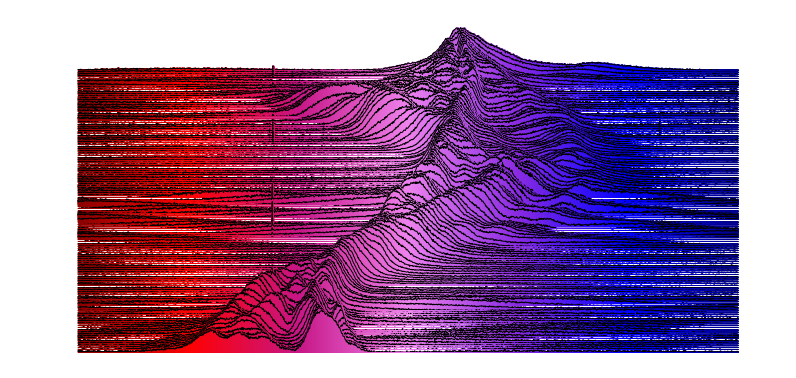

In [7]:

fig, axes = plt.subplots(len(ell_values),1, figsize = (6.5,3), facecolor='w')

colorlist = ["darkblue","blue","blueviolet","violet","mediumvioletred", "red","darkred"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colorlist)

x = freqs_in_window(L = 1419.405751786, R = 1421.405751786)
z = -x

normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

for i, ax in enumerate(axes.reshape(-1)):
    ell = ell_values[i]
    y = shift(spectra_in_window(mean_spectra(fits_ell(ell))))
    
    ax.plot(x, y, lw = 0.5, color = 'k')

    for j in range(len(x) - 1):
        ax.fill_between([x[j], x[j+1]], [y[j], y[j+1]], color=cmap(normalize(z[j])))
        sys.stdout.write('\r'+str('%d, %d' %(i,j))) 
        
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim(0)
    ax.axis('off')
    if ell % 25 == 0:
        ax.set_ylabel(str(ell), rotation = 0, labelpad = 20)
        ax.yaxis.set_label_coords(-.01, 0)
    
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.95)

# fig.savefig('blue_red_shift_plot.pdf', format = 'pdf', dpi = 320)

plt.axis('off')

plt.show()

> 129 observation spectra with Doppler shift indicated by color. For clarity, here each power spectrum has had a simple second order polynomial fitted and subsequently subtracted from it. By presenting the spectra in this form we are able to view how the spectra shift and change shape depending on $\ell$. We see structure here, indicating that the hydrogen clouds the signals originate from also have structure.

128

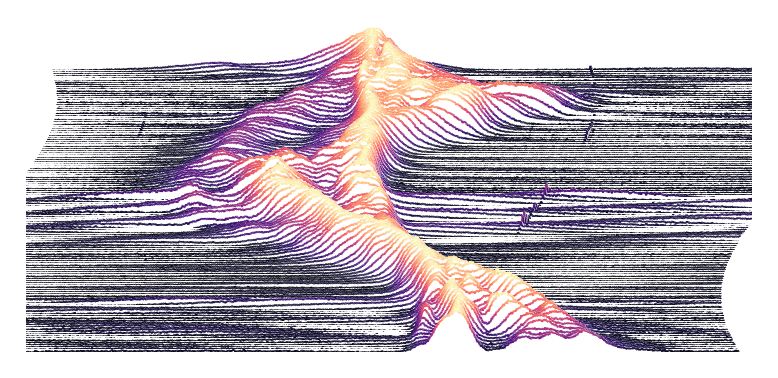

In [6]:
# Intensity Calibration Plot
fig, axes = plt.subplots(len(ell_values),1, figsize = (6.5,3), facecolor='white')

for i, ax in enumerate(axes.reshape(-1)):

    ell = ell_values[i]

    ax.axis('off')
    x = corrected_velocity(ell)#np.linspace(0,100,100)
    y = shifted_intensity(ell, combine = False)#2 * np.linspace(0,100,100)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    path = mpath.Path(np.column_stack([x, y]))
    verts = path.interpolated(steps=3).vertices
    
    x, y = verts[:, 0], verts[:, 1]
    normalize = mpl.colors.Normalize(vmin=0, vmax=250)
    arr_color = cm.ScalarMappable(cmap = cm.magma).to_rgba(shifted_intensity(ell, combine = False))
    
    lc = mcoll.LineCollection(segments,
                              colors = arr_color, norm = normalize,
                              cmap = cm.magma, linewidths = 1)
    
    ax.add_collection(lc)
    
    ax.fill_between(corrected_velocity(ell), shifted_intensity(ell, combine = False), 0, interpolate = True, color = 'white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(-200,200)
    ax.set_ylim(0)
    sys.stdout.write('\r'+str('%d' %i )) 
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.95)
plt.axis('off')
# fig.savefig('vel_intens_ell.pdf', format = 'pdf', dpi = 320)
# fig.savefig('vel_intens_ell.png', format = 'png', dpi = 320)

plt.show()

> 129 calibrated observation profiles with intensity indicated by color. Each spectra has been calibrated using Equation \ref{eqn:inten} and has had a second order polynomial fit removed. The velocity data was computed using Equation \ref{eqn:vdopp}. The curved whitespace visible in the lower right corner is caused by the adjustment $v_\text{LSR}$, different for each observation. After calibration the structure noted in Figure \ref{fig:red_blue_shift_good} remains visible, and the high intensity peaks are easy to follow along the structure.